<a href="https://colab.research.google.com/github/Guptarohit2003/Machine-Learning/blob/main/Tensorflow/01_neural_network_regression_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural networks in TensorFlow

In [2]:
import tensorflow as tf
tf.__version__

'2.15.0'

# Create Data view and fit

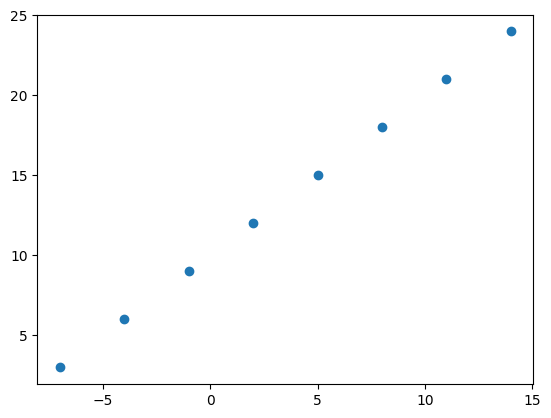

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Create Feature
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create Label
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input Output Shapes

In [5]:
#create demo tensor for house prediction
house_info = tf.constant(["bedroom", "bathroom", 'garage'])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X = tf.constant(X)
y = tf.constant(y)

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow

1. Create a model
2. Compile a model
3. Fitting a model

In [8]:
 tf.random.set_seed(42)

 # Create a model
 model = tf.keras.Sequential()

 model.add(tf.keras.layers.Dense(1))

 # Compile the model
 model.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics=['mae'])

 # Fit the model
 model.fit(tf.expand_dims(X, axis = -1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 578ms/step - loss: 21.2895 - mae: 21.2895
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 20.8964 - mae: 20.8964
Epoch 3/5
1/1 [==============================] - 0s 17ms/step - loss: 20.5194 - mae: 20.5194
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 20.2382 - mae: 20.2382
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 19.9569 - mae: 19.9569


In [9]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
model.predict([17.0])

1/1 [==============================] - 0s 115ms/step


array([[-22.472422]], dtype=float32)

## Improve our model

We can improve our model, by altering the steps we took to create a model

**Creating a model** : here we might add more layers, increase # hidden units (neurons) within each of the hidden layers, change the activation function of each layer.

**Compiling a model** : here we might change the optimization function or perhaps the **learning rate** of the optimization function.

**Fitting a model** : here we might fit a model for more **epochs** or on more data.

In [11]:
# Let's rebuild the model for improvement
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)

])

model.compile(loss = "mae",
              optimizer = "sgd",
              metrics = ["mae"])

# Fit the model (modified)
model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 408ms/step - loss: 11.1702 - mae: 11.1702
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 11.0377 - mae: 11.0377
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 10.9052 - mae: 10.9052
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 10.7727 - mae: 10.7727
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.6402 - mae: 10.6402
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 10.5077 - mae: 10.5077
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.3752 - mae: 10.3752
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 10.2427 - mae: 10.2427
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 10.1102 - mae: 10.1102
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 9.9777 - mae: 9.9777
Epoch 11/100
1/1 [==============================] 

In [12]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [13]:
model.predict([17.0])

1/1 [==============================] - 0s 192ms/step


array([[29.990997]], dtype=float32)

In [14]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(1)
 ])


model.compile(loss= 'mae',
               optimizer = 'sgd',
               metrics=["mae"])

model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.0842 - mae: 13.0842
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 12.5478 - mae: 12.5478
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 12.0129 - mae: 12.0129
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 11.4391 - mae: 11.4391
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 10.7964 - mae: 10.7964
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 10.0392 - mae: 10.0392
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 9.1239 - mae: 9.1239
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 8.1430 - mae: 8.1430
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 6.8312 - mae: 6.8312
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 5.0167 - mae: 5.0167
Epoch 11/100
1/1 [==============================] - 0s 13ms

In [15]:
model.predict([17.0])

1/1 [==============================] - 0s 94ms/step


array([[30.800386]], dtype=float32)

In [16]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(1)
 ])


model.compile(loss= tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
               metrics=["mae"])

model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.2778 - mae: 12.2778
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 12.2345 - mae: 12.2345
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 12.1911 - mae: 12.1911
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 12.1481 - mae: 12.1481
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 12.1064 - mae: 12.1064
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 12.0646 - mae: 12.0646
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 12.0224 - mae: 12.0224
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 11.9795 - mae: 11.9795
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 11.9363 - mae: 11.9363
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 11.8930 - mae: 11.8930
Epoch 11/100
1/1 [==============================] -

In [17]:
model.predict([17.0])

1/1 [==============================] - 0s 102ms/step


array([[20.777197]], dtype=float32)

In [65]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(50, activation = None),
     tf.keras.layers.Dense(1)
 ])


model.compile(loss= tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
               metrics=["mae"])

model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 43.4931 - mae: 43.4931
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 25.3862 - mae: 25.3862
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 12.5587 - mae: 12.5587
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 11.4190 - mae: 11.4190
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 17.0710 - mae: 17.0710
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 16.0471 - mae: 16.0471
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 10.8540 - mae: 10.8540
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2880 - mae: 9.2880
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 8.8102 - mae: 8.8102
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 10.7856 - mae: 10.7856
Epoch 11/100
2/2 [==============================] - 0s 9ms/s

In [66]:
model.predict([17.0])

1/1 [==============================] - 0s 105ms/step


array([[26.737745]], dtype=float32)

## Evaluating a model

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it.......
```



When it comes to evaluation. we have to do

> Visualization

It's a good idea to visualize:

* The data - what data are we working with ? what does it looks like?
* The model itself - what does our model looks like?
* The training of model - how does a model perform while it learns?
* The prediction of the model - how do the predictions of a model line up against the ground truth.

In [20]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [21]:
y = X +10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

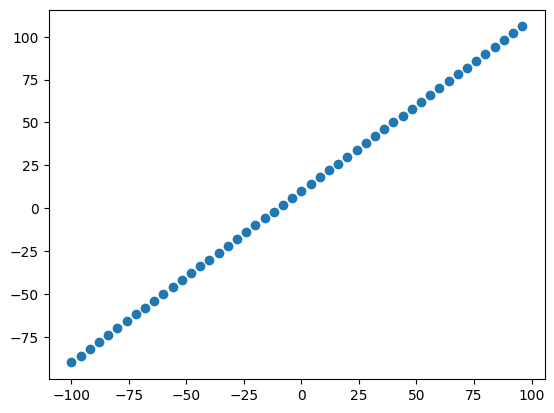

In [22]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### 3 sets

* Training set - the model learns from this data, which is around 79-80% of total data
* Valdation set - the model gets tuned on this data, which is around 10-15% of total data
* Test set - the model gets evaluated on this data, which is typically 10- 15% of total data


In [23]:
X_train = X[:40]
X_test = X[40:]

In [24]:
y_train = y[:40]
y_test = y[40:]

In [25]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### visualizing the data

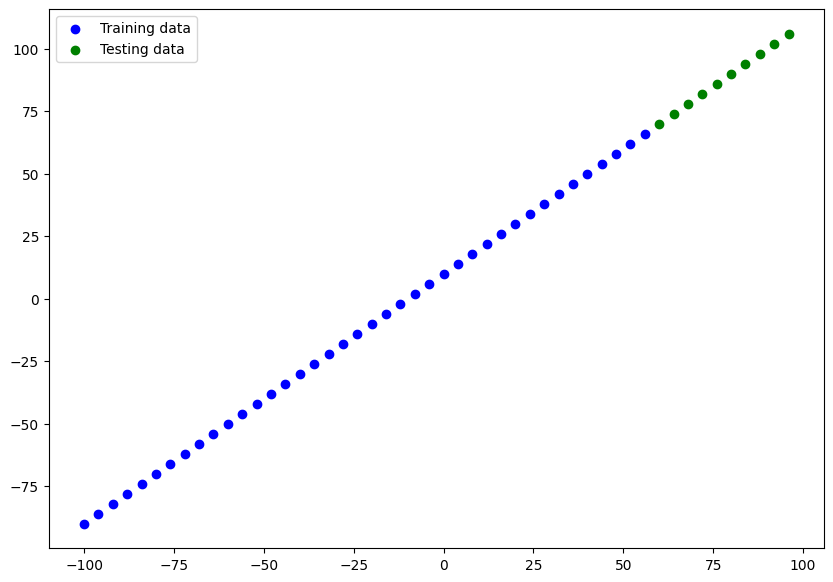

In [26]:
plt.figure(figsize = (10, 7))

plt.scatter(X_train, y_train, c = 'b', label = 'Training data')

plt.scatter(X_test, y_test, c = 'g', label = 'Testing data')

plt.legend()

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.losses.mae,
              optimizer = tf.optimizers.SGD(),
              metrics = ['mae'])

# model.fit(X_train, y_train, epochs = 100)

In [28]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [29]:
 tf.random.set_seed(42)

 model = tf.keras.Sequential([
     tf.keras.layers.Dense(10, input_shape = [1],name='input_layer'),
     tf.keras.layers.Dense(1, name = 'output_layer')
 ], name = "Model_1")

 model.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mae'])

In [67]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 50)                100       
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.fit(X_train, y_train, epochs = 100, verbose=0)

In [32]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


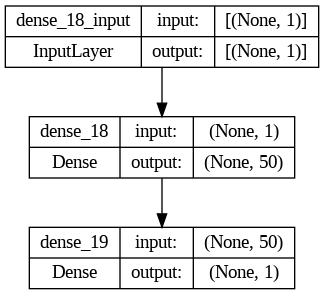

In [68]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True)

## Visualize our Model's prediction

In [69]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 60ms/step


array([[ 69.72752 ],
       [ 73.72657 ],
       [ 77.72563 ],
       [ 81.72468 ],
       [ 85.72372 ],
       [ 89.72278 ],
       [ 93.72182 ],
       [ 97.72088 ],
       [101.719925],
       [105.71897 ]], dtype=float32)

In [70]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [71]:
model.predict([17.0])

1/1 [==============================] - 0s 44ms/step


array([[26.737745]], dtype=float32)

In [72]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c= "b", label = "training Data")

  plt.scatter(test_data, test_labels, c = 'g', label = "testing Data")

  plt.scatter(test_data, predictions, c = 'r', label = "Predictions")

  plt.legend

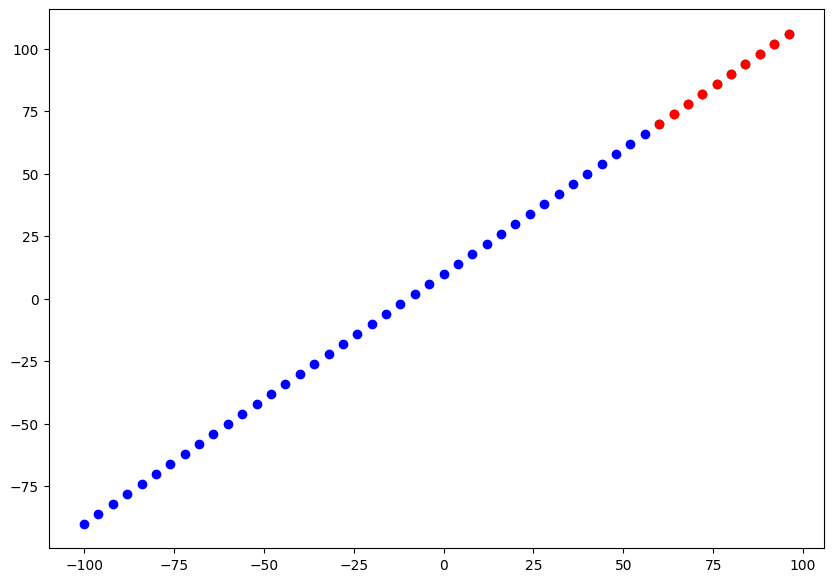

In [74]:
plot_predictions()

### Evaluating using regression evaluation metrics

In [75]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 125ms/step - loss: 0.2768 - mae: 0.2768


[0.276754766702652, 0.276754766702652]

In [76]:
# Ca;culate the mean absolute error

mae = tf.metrics.mean_absolute_error(y_true= y_test,
                                     y_pred = y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.272476 , 15.0187435, 12.564621 , 10.910129 , 10.055257 ,
       10.       , 10.744364 , 12.288351 , 14.631955 , 17.775177 ],
      dtype=float32)>

In [77]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 69.72752 ],
       [ 73.72657 ],
       [ 77.72563 ],
       [ 81.72468 ],
       [ 85.72372 ],
       [ 89.72278 ],
       [ 93.72182 ],
       [ 97.72088 ],
       [101.719925],
       [105.71897 ]], dtype=float32)>

In [78]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [79]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.72752 ,  73.72657 ,  77.72563 ,  81.72468 ,  85.72372 ,
        89.72278 ,  93.72182 ,  97.72088 , 101.719925, 105.71897 ],
      dtype=float32)>

In [80]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.27675095>

In [81]:
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.07659854>

In [82]:
def MAE(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def MSE(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Model Improvement

1. Get more Data
2. Make model Larger.
3. Train for Longer

In [47]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

3 modelling Experiments

1. `model_1` = same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` = 2 layers, trained for 100 epochs.
3. `model_3` = 2 layers, trained for 500 epochs

In [83]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 14ms/step - loss: 9.5784 - mae: 9.5784
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 10.2339 - mae: 10.2339
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 10.0892 - mae: 10.0892
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 9.5157 - mae: 9.5157
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 10.4186 - mae: 10.4186
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.6501 - mae: 9.6501
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.7532 - mae: 8.7532
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.0536 - mae: 9.0536
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 19.2212 - mae: 19.2212
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 10.3709 - mae: 10.3709
Epoch 11/100
2/2 [==============================] - 0s 12ms/st

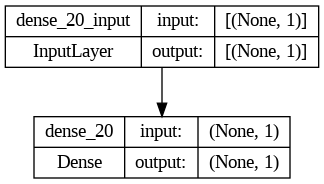

In [84]:
from tensorflow.keras.utils import plot_model
plot_model(model_1,show_shapes=True)

In [85]:
y_pred_1 = model_1.predict(X_test)
y_pred_1

1/1 [==============================] - 0s 52ms/step


array([[ 74.623726],
       [ 79.511185],
       [ 84.39864 ],
       [ 89.2861  ],
       [ 94.17355 ],
       [ 99.06101 ],
       [103.94847 ],
       [108.83592 ],
       [113.72338 ],
       [118.61084 ]], dtype=float32)

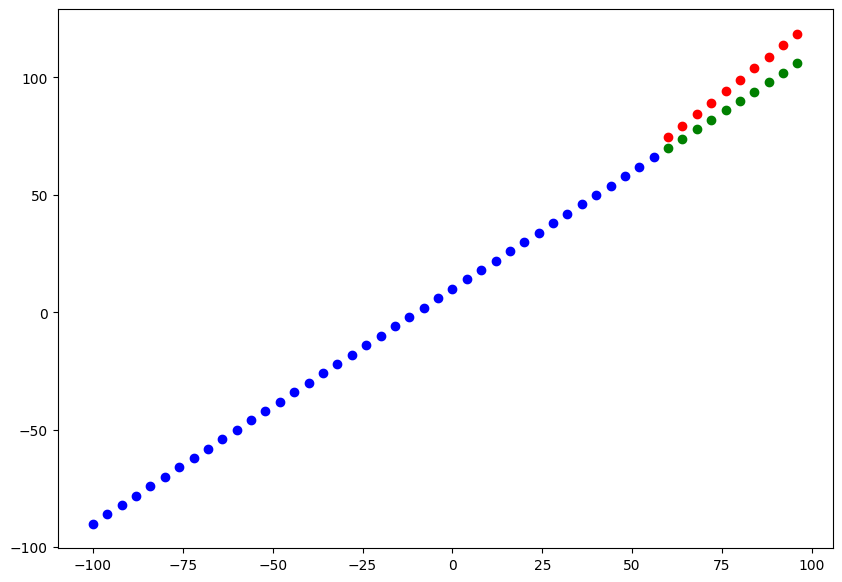

In [86]:
plot_predictions(predictions=y_pred_1)

In [87]:
mae_1 = MAE(y_true=y_test, y_pred=y_pred_1)
mse_1 = MSE(y_true = y_test, y_pred=y_pred_1)

### `model_2`

In [88]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape = [1]),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 34.0319 - mae: 34.0319
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 28.2777 - mae: 28.2777
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 33.2306 - mae: 33.2306
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 28.2331 - mae: 28.2331
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 15.3458 - mae: 15.3458
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 12.1828 - mae: 12.1828
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.4767 - mae: 11.4767
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2020 - mae: 11.2020
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 41.7731 - mae: 41.7731
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 28.9997 - mae: 28.9997
Epoch 11/100
2/2 [==============================] - 0s 8

1/1 [==============================] - 0s 64ms/step


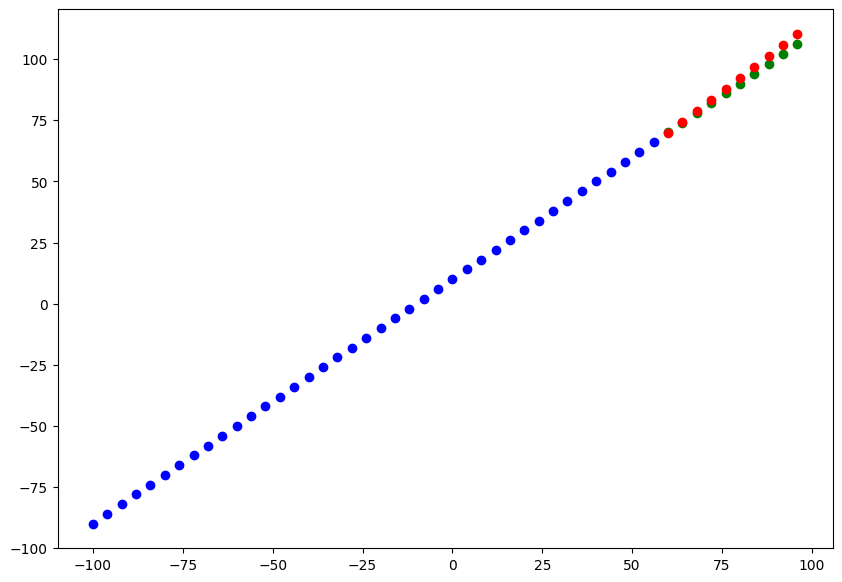

In [89]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [90]:
mae_2 = MAE(y_test, y_pred_2)

In [91]:
mse_2 = MSE(y_test, y_pred_2)

### `model_3`

In [92]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape = [1]),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

model_3.fit(X_train, y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 12ms/step - loss: 40.7843 - mae: 40.7843
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 31.2010 - mae: 31.2010
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 35.5460 - mae: 35.5460
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 30.7150 - mae: 30.7150
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 15.6350 - mae: 15.6350
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 12.4047 - mae: 12.4047
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 11.6857 - mae: 11.6857
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 12.0875 - mae: 12.0875
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 37.8336 - mae: 37.8336
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 25.4476 - mae: 25.4476
Epoch 11/500
2/2 [==============================] - 0s 9m

1/1 [==============================] - 0s 117ms/step


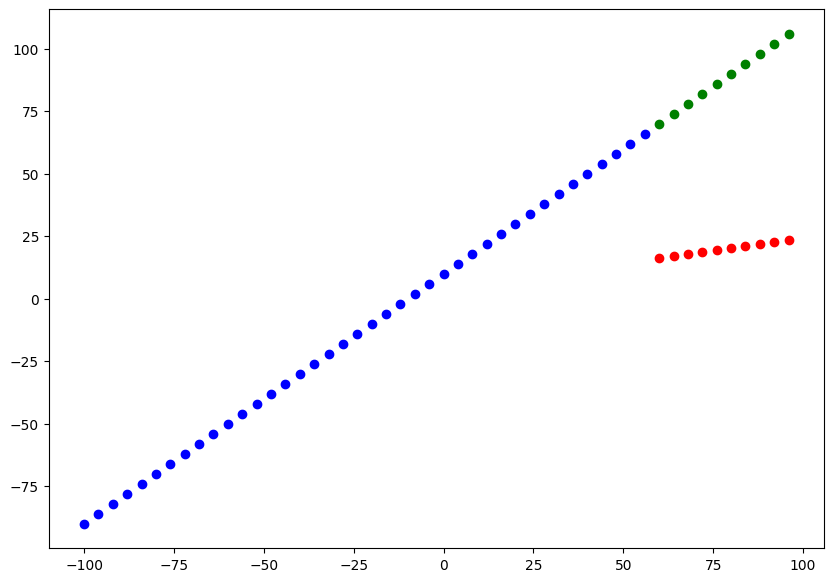

In [93]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [94]:
mae_3 = MAE(y_test, y_pred_3)
mse_3 = MSE(y_test, y_pred_3)

## COmpanring the results of experiments

In [95]:
import pandas as pd

model_list = [['model_1', mae_1.numpy(), mse_1.numpy()],
              ['model_2', mae_2.numpy(), mse_2.numpy()],
              ['model_3', mae_3.numpy(), mse_3.numpy()]]

In [96]:
pd.DataFrame(model_list, columns=['model_name', 'mae', 'mse'])

,model_name,mae,mse
0,model_1,8.617284,80.755112
1,model_2,2.054909,6.195335
2,model_3,68.113647,4724.387695


In [97]:
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Tracking our experiments

One really good habit in machine Learning modelling is to track the result of your experiments.

**Resources:** As you build more models. you'll want to look into using.
* Tensorboarrd
* Weights and Biases

## Save our model

There are two formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [98]:
model_2.save("Best_model_SavedModel_format")

In [99]:
model_2.save("Best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [100]:
# Load model
loaded_SavedModel_format = tf.keras.models.load_model('/content/Best_model_SavedModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [101]:
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [104]:
# Comparing predictions
model_2_pred = model_2.predict(X_test)
loaded_SavedModel_format_pred = loaded_SavedModel_format.predict(X_test)
model_2_pred == loaded_SavedModel_format_pred

1/1 [==============================] - 0s 30ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [103]:
model_2_pred, loaded_SavedModel_format_pred

(array([[ 69.60366 ],
        [ 74.130775],
        [ 78.65788 ],
        [ 83.18498 ],
        [ 87.71209 ],
        [ 92.2392  ],
        [ 96.7663  ],
        [101.2934  ],
        [105.82051 ],
        [110.34761 ]], dtype=float32),
 array([[ 69.60366 ],
        [ 74.130775],
        [ 78.65788 ],
        [ 83.18498 ],
        [ 87.71209 ],
        [ 92.2392  ],
        [ 96.7663  ],
        [101.2934  ],
        [105.82051 ],
        [110.34761 ]], dtype=float32))

In [106]:
loaded_h5_model = tf.keras.models.load_model('/content/Best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
loaded_h5_model_pred = loaded_h5_model.predict(X_test)
model_2_pred == loaded_h5_model_pred

1/1 [==============================] - 0s 24ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])